<a href="https://colab.research.google.com/github/thaisgarcia/music-analysis/blob/main/AnalisePlaylistSpotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de uma Playlist de Rock do Spotify
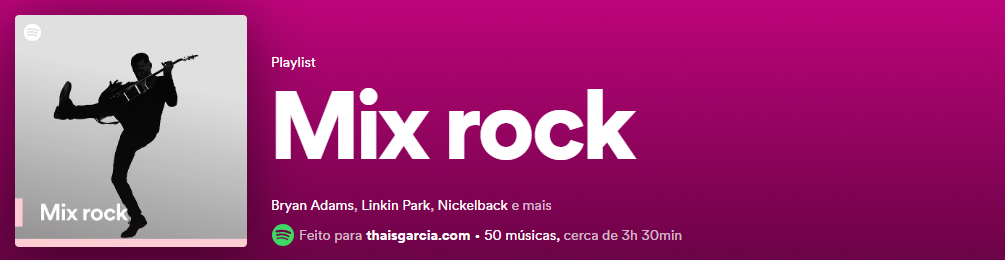

In [1]:
!pip install spotipy
!pip install wordcloud

BIBLIOTECAS

🐼 Pandas: manipulação do dataset

📊 MatPlotLib + Seaborn: análise gráfica

🧮 Numpy: cálculos e manipulação de arrays

📐 Scipy: para normalização de dados

🎶 Spotipy: para consumirmos a API do Spotify e obtermos dados da playlist

🗓️ Datetime: manipular datas

💬 Wordcloud: análise de palavras mais frequentes

In [2]:
import spotipy
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from scipy.stats import norm, skew
from wordcloud import WordCloud

In [3]:
spotify_details = {
    'client_id' : 'seu_client_id',
    'client_secret':'seu_client_secret',
    'redirect_uri':'https://beacons.ai/thaisgarcia11'}

In [4]:
try:
  sp = spotipy.Spotify(auth_manager=spotipy.SpotifyOAuth(
          client_id=spotify_details['client_id'],
          client_secret=spotify_details['client_secret'],
          redirect_uri=spotify_details['redirect_uri'], open_browser=False))
except:
  print('Token is not accesible')

Importando dados da Playlist:

In [5]:
rock_playlist = sp.playlist_tracks('https://open.spotify.com/playlist/37i9dQZF1EQpj7X7UK8OOF')

tracks = rock_playlist['items']
while rock_playlist['next']:
        rock_playlist = sp.next(rock_playlist)
        tracks.extend(rock_playlist['items'])

In [6]:
audio_features = []

# criando novo arquivo CSV e cabeçalho
with open('musicas.csv', mode = 'w') as csvfile:
  csv.writer(csvfile, delimiter=',').writerow([
        'Nome da música',
        'Nome do artista',
        'Álbum',
        'Data de lançamento do álbum',
        'Qtd músicas no álbum',
        'Duração em min',
        'Conteúdo explícito',
        'Preview da música',
        'Energia',
        'Ao vivo',
        'Acústica',
        'Instrumental',
        'Dançabilidade',
        'Volume',
  ])

  for musicas in tracks:

    audio_features = sp.audio_features(musicas['track']['id'])

    # obter informações detalhadas de áudio da música
    nomes_artistas = str({artista['name'] for artista in musicas['track']['artists']})
    energia = str({audio['energy'] for audio in audio_features})
    vivacidade = str({audio['liveness'] for audio in audio_features})
    acustica = str({audio['acousticness'] for audio in audio_features})
    instrumental = str({audio['instrumentalness'] for audio in audio_features})
    danca = str({audio['danceability'] for audio in audio_features})
    volume = str({audio['loudness'] for audio in audio_features})

    # remover caracteres especiais
    caracteres = '{"}'
    for i in range(0,len(caracteres)):
      nomes_artistas = nomes_artistas.replace(caracteres[i],"")
      energia = energia.replace(caracteres[i],"")
      vivacidade = vivacidade.replace(caracteres[i],"")
      acustica = acustica.replace(caracteres[i],"")
      instrumental = instrumental.replace(caracteres[i],"")
      danca = danca.replace(caracteres[i],"")
      volume = volume.replace(caracteres[i],"")

    # escrever dados no csv
    csv.writer(csvfile, delimiter=',').writerow([
            musicas['track']['name'],
            nomes_artistas,
            musicas['track']['album']['name'],
            musicas['track']['album']['release_date'],
            musicas['track']['album']['total_tracks'],
            musicas['track']['duration_ms'] / 60000,
            musicas['track']['explicit'],
            musicas['track']['preview_url'],
            energia,
            vivacidade,
            acustica,
            instrumental,
            danca,
            volume
    ])

    musicas['track']['album']['release_date']

In [7]:
df = pd.read_csv('musicas.csv')
print('Número de músicas:', len(df.index))
df.head()

Número de músicas: 50


,Nome da música,Nome do artista,Álbum,Data de lançamento do álbum,Qtd músicas no álbum,Duração em min,Conteúdo explícito,Preview da música,Energia,Ao vivo,Acústica,Instrumental,Dançabilidade,Volume
0,Heaven,'Bryan Adams',Reckless (30th Anniversary / Deluxe Edition),1984-11-05,32,4.056000,False,https://p.scdn.co/mp3-preview/a02f96375ee67e1e...,0.589,0.1220,0.04650,0.000000,0.382,-7.315
1,CASTLE OF GLASS,'Linkin Park',LIVING THINGS,2012-06-20,12,3.423333,False,https://p.scdn.co/mp3-preview/4a1db9ba57b75cd3...,0.911,0.0908,0.06860,0.001880,0.615,-3.584
2,What Are You Waiting For?,'Nickelback',No Fixed Address,2014-11-17,11,3.648433,False,https://p.scdn.co/mp3-preview/a3bd3e783def4293...,0.826,0.2790,0.03130,0.000000,0.505,-8.106
3,Centuries,'Fall Out Boy',American Beauty/American Psycho,2015-01-20,11,3.806000,False,https://p.scdn.co/mp3-preview/d6fcac6047be8c06...,0.858,0.1020,0.00359,0.000000,0.393,-2.868
4,Snow (Hey Oh),'Red Hot Chili Peppers',Stadium Arcadium,2006-05-09,29,5.577767,False,https://p.scdn.co/mp3-preview/d1e419a7f2aa9ba7...,0.900,0.1190,0.11600,0.000017,0.427,-3.674


Verificando dados ausentes:

In [8]:
df_ausentes = df.isnull().sum()
df_ausentes

Nome da música                 0
Nome do artista                0
Álbum                          0
Data de lançamento do álbum    0
Qtd músicas no álbum           0
Duração em min                 0
Conteúdo explícito             0
Preview da música              0
Energia                        0
Ao vivo                        0
Acústica                       0
Instrumental                   0
Dançabilidade                  0
Volume                         0
dtype: int64

Análise das features numéricas:

In [9]:
numericas = df.select_dtypes(include = [np.number])
numericas.columns

Index(['Qtd músicas no álbum', 'Duração em min', 'Energia', 'Ao vivo',
       'Acústica', 'Instrumental', 'Dançabilidade', 'Volume'],
      dtype='object')

Relação de **Energia** com **Dançabilidade**:

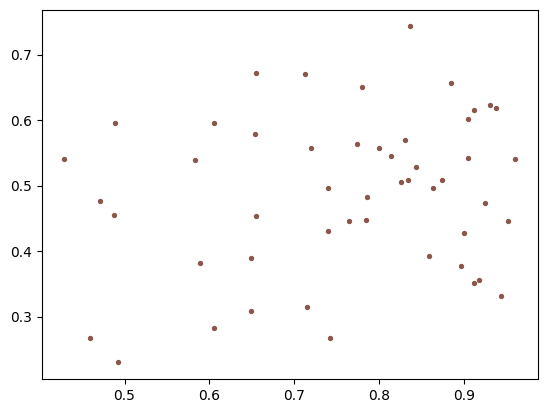

In [10]:
plt.scatter(df['Energia'], df['Dançabilidade'], 8, color = "C5" )
plt.show()

Relação de **Energia** com **Volume**:

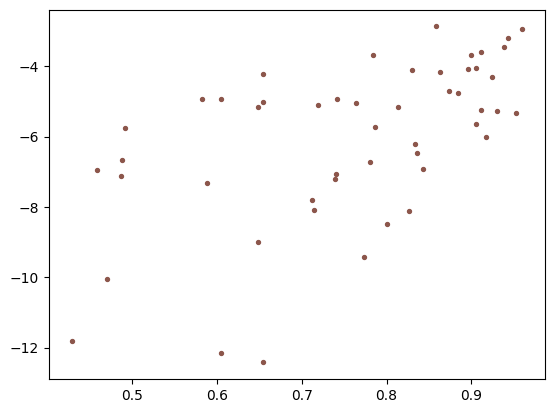

In [11]:
plt.scatter(df['Energia'], df['Volume'], 8, color = "C5" )
plt.show()

Relação do **Volume** com **Acústica**:

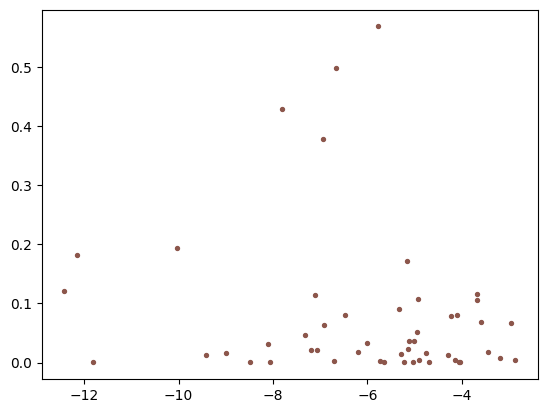

In [12]:
plt.scatter(df['Volume'], df['Acústica'], 8, color = "C5" )
plt.show()

Analisando qual é a banda com a música mais curta da playlist e também com a música mais longa:

In [13]:
print(df['Nome do artista'][df['Duração em min'] == df['Duração em min'].min()])
print(df['Nome do artista'][df['Duração em min'] == df['Duração em min'].max()])

29    'Queen'
Name: Nome do artista, dtype: object
40    'Scorpions'
Name: Nome do artista, dtype: object


Palavras que mais aparecem no título das músicas:

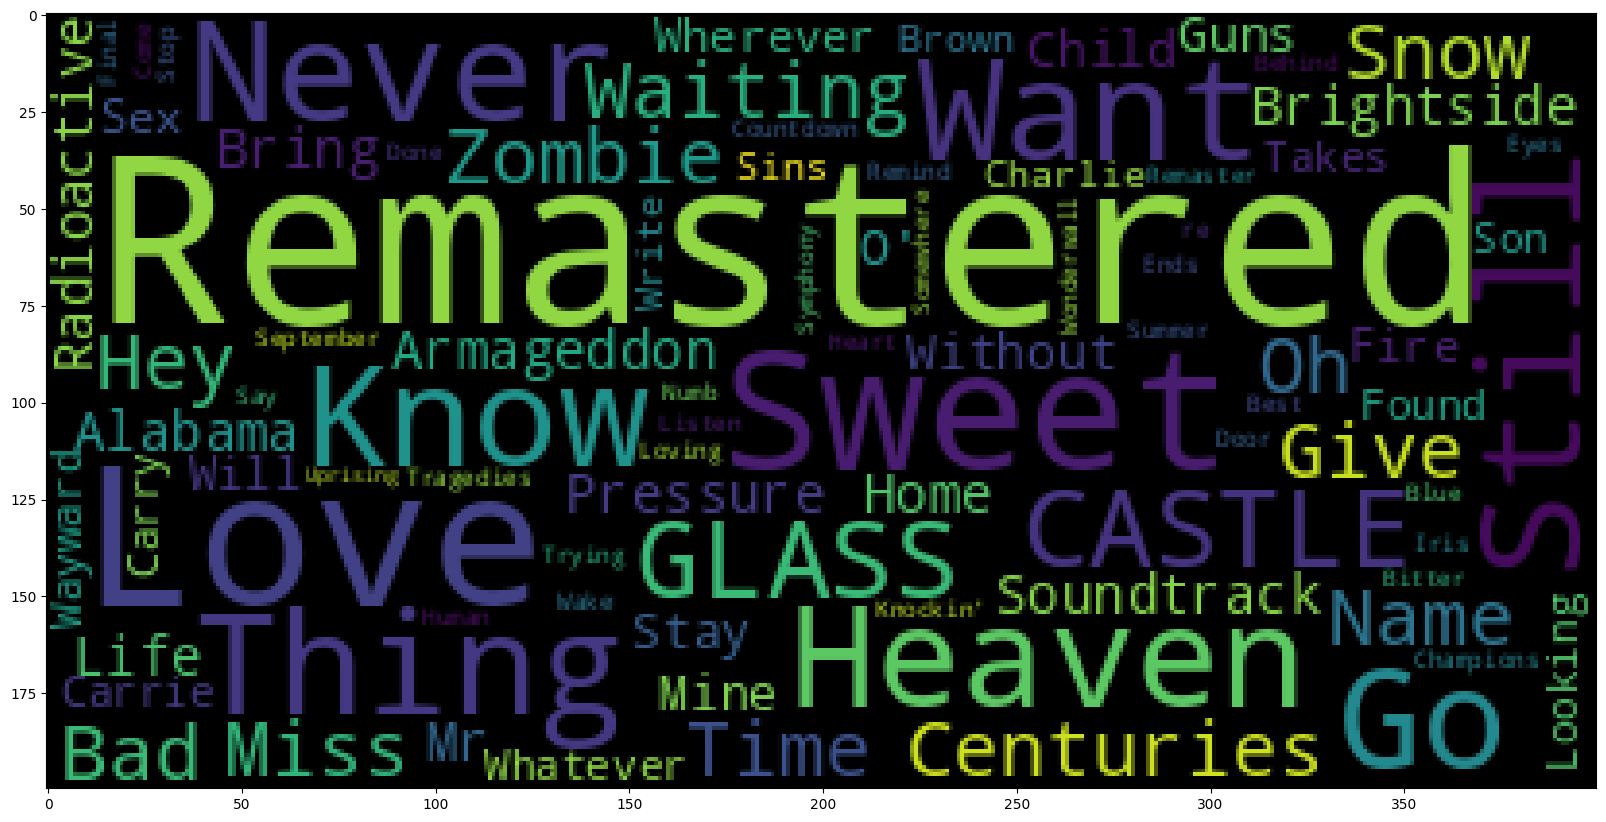

In [14]:
lista = df['Nome da música'].tolist()
paragrafo = " ".join(lista)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(paragrafo))

Presença de conteúdo explícito nas músicas:

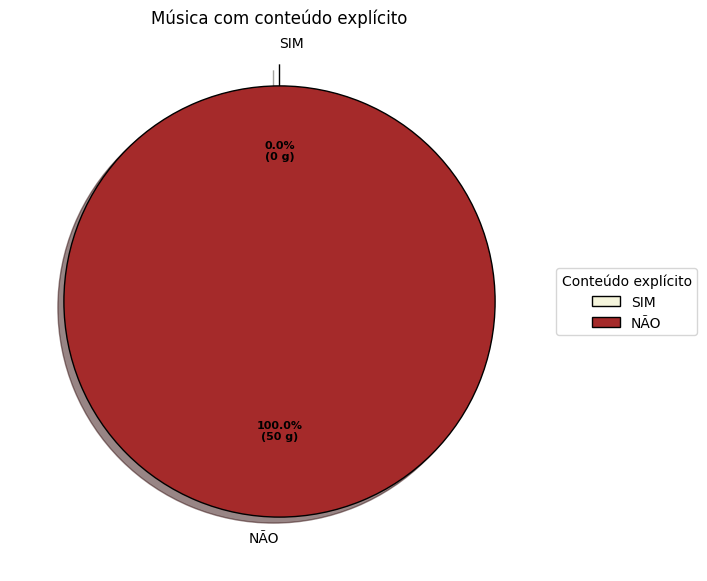

In [15]:
# dados
legenda = ['SIM', 'NÃO']
data = [(df['Conteúdo explícito'] == True).sum(), (df['Conteúdo explícito'] == False).sum()]

# costumização do gráfico de pizza
explode = (0.1, 0.0)
colors = ("beige", "brown")
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = legenda,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
ax.legend(wedges, legenda,
          title ="Conteúdo explícito",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Música com conteúdo explícito")

plt.show()

Distribuição do tempo de duração das músicas:


<ipython-input-16-be248b276563>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Duração em min'], fit=norm)


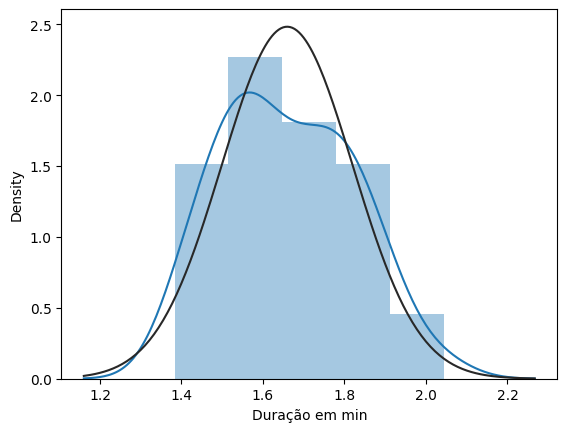

In [16]:
df['Duração em min'] = np.log1p(df['Duração em min'])
sns.distplot(df['Duração em min'], fit=norm)
plt.show()